In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import pickle

pickle_in = open("vectorized_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("vectorized_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
categories=['not_myface','myface']

In [17]:
y=y.reshape(-1,)

# Data shape

In [18]:
y.shape

(14140,)

In [19]:
X.shape

(14140, 150, 150, 3)

# Normalizing the data

In [20]:
X=X/255

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y_train # the data have been sort in random order

array([1, 1, 0, ..., 0, 0, 1])

# Building the model

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
354/354 [==============================] - 107s 303ms/step - loss: 0.1165 - accuracy: 0.9515
Epoch 2/10
354/354 [==============================] - 105s 297ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 3/10
354/354 [==============================] - 108s 305ms/step - loss: 0.0099 - accuracy: 0.9969
Epoch 4/10
354/354 [==============================] - 106s 298ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 5/10
354/354 [==============================] - 105s 296ms/step - loss: 0.0063 - accuracy: 0.9986
Epoch 6/10
354/354 [==============================] - 105s 297ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 7/10
354/354 [==============================] - 106s 298ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 8/10
354/354 [==============================] - 105s 296ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 9/10
354/354 [==============================] - 105s 296ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 10/10
354/354 [==============================] - 104s 294m

# We get a pretty high accuracy

In [26]:
cnn.evaluate(X_test, y_test)

89/89 [==============================] - 8s 88ms/step - loss: 0.0069 - accuracy: 0.9982


[0.00685202656313777, 0.9982319474220276]

# Pick some picture in the test set randomly and see how our model predict them

In [27]:
X_test.shape #We have 2660 image in the test set

(2828, 150, 150, 3)

In [28]:
import random

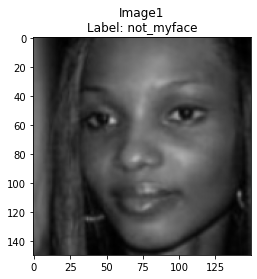

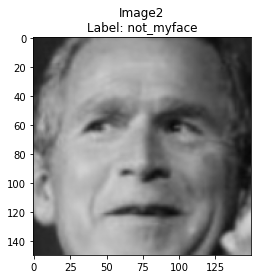

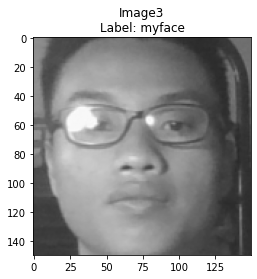

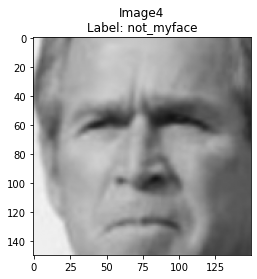

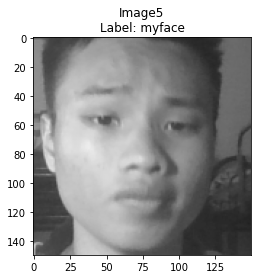

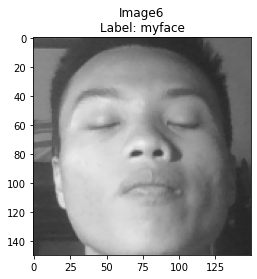

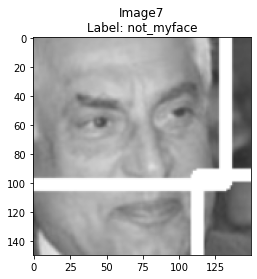

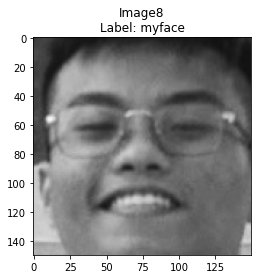

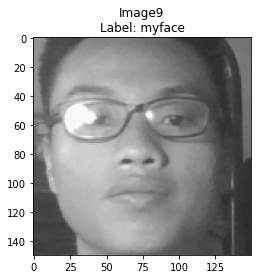

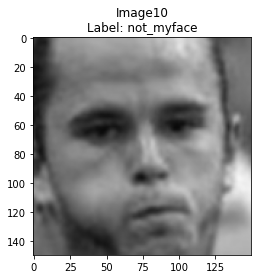

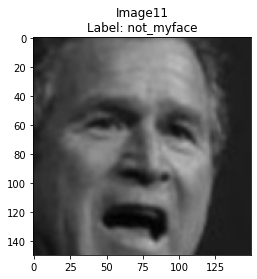

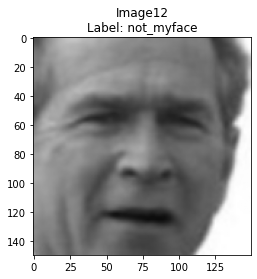

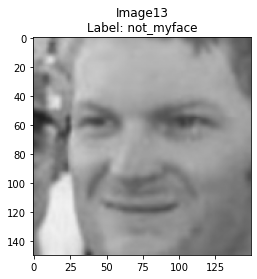

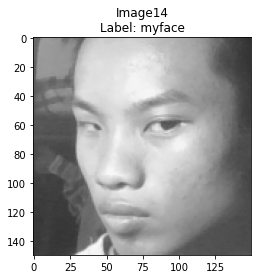

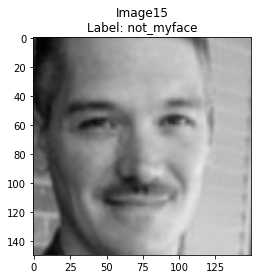

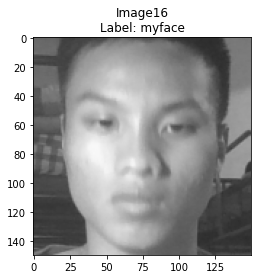

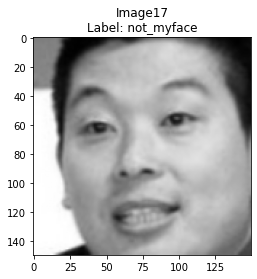

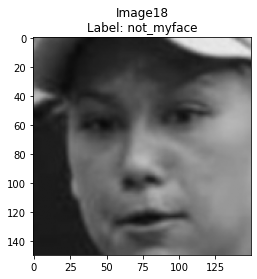

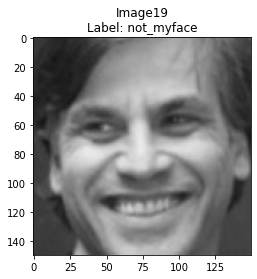

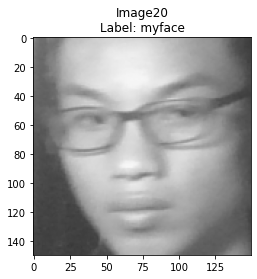

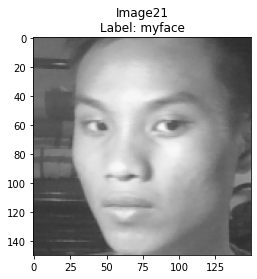

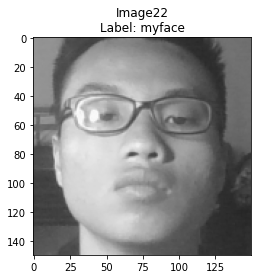

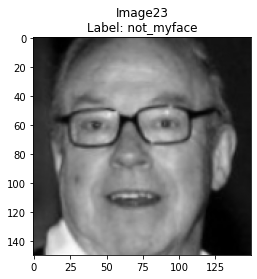

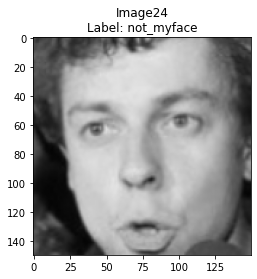

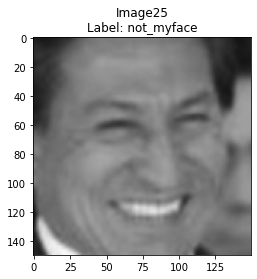

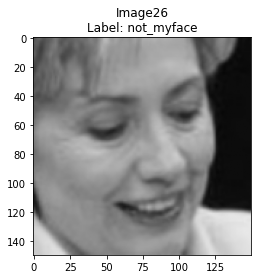

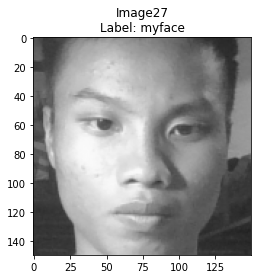

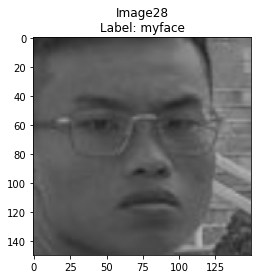

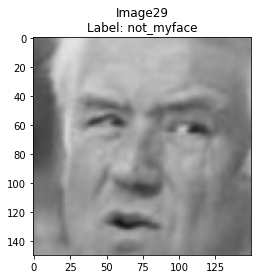

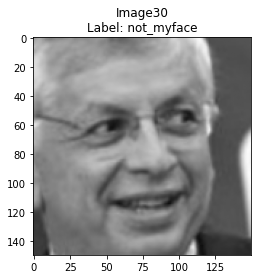

In [29]:
for i in range(30):
    x=random.randint(0,2660)
    label=cnn.predict(np.array([X_test[x]])).argmax()
    categories[label]
    plt.imshow(X_test[x])
    plt.title("Image"+str(i+1)+"\n"+"Label: "+categories[label])
    plt.show()

# Analyse the model base on the resulting prediction of the test set

In [30]:
Y=cnn.predict(X_test)

In [31]:
y_test_predicted=[]
for i in Y:
    y_test_predicted.append(i.argmax())
y_test_predicted=np.array(y_test_predicted)

In [32]:
y_test_predicted

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
y_test

array([0, 1, 1, ..., 1, 1, 0])

Drawing the seaborn 

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_predicted)
cm

array([[1426,    4],
       [   1, 1397]], dtype=int64)

In [35]:
ticklabels=['Not my face', 'my face']

Text(69.0, 0.5, 'Atual')

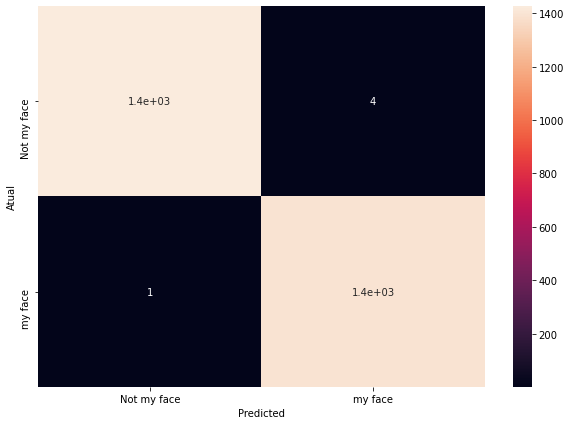

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,xticklabels=ticklabels,yticklabels=ticklabels)
plt.xlabel('Predicted')
plt.ylabel('Atual')

# Saving the model

In [37]:
cnn.save('CNN_final.h5')